<a href="https://colab.research.google.com/github/MananShukla7/Colab-Notebook/blob/main/04_Computer_Vision_Pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##0. Computer_vision Libraries

* `torchvision` -base domain lib for pytorch comp vision
* `torchvision.datasets` -get datasets and data loading functions for computer vision here
* `torchvision.models` -get pretrained computer vision models that you can leverage for your own problems
* `torchvision.transforms` -funtions for manipulating your vision data(images) to be suitable for use with ml models
* `torchvision.data.Dataset` -Base datasets class for Pytorch
* `torch.utils.data.DataLoaders` -Creates a python iterable over a dataset

In [1]:
import torch
from torch import nn

import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt

##1. Getting a dataset

Going to use Fashion MNIST's dataset from torchvision datasets

In [2]:
#Setup training data

In [3]:
train_data=datasets.FashionMNIST(root="data",
                                 train=True,
                                 download=True,
                                 transform=ToTensor(),
                                 target_transform=None)

test_data=datasets.FashionMNIST(root="data",
                                train=False,
                                download=True,
                                transform=ToTensor(),
                                target_transform=None)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [4]:
len(train_data),len(test_data)

(60000, 10000)

In [5]:
train_data

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [6]:
image,label=train_data[0]
image,label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [7]:
class_names=train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [8]:
class_to_idx=train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [9]:
train_data.train_labels.unique()

/usr/local/lib/python3.8/dist-packages/torchvision/datasets/mnist.py:65: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [10]:
#Check the shape of out image

In [11]:
image.shape,label

(torch.Size([1, 28, 28]), 9)

###1.2 Visualizing our data

Image shape: torch.Size([1, 28, 28])


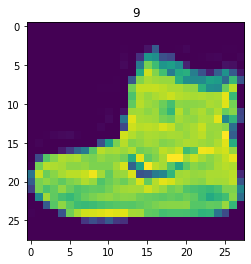

In [12]:
image,label=train_data[0]
print(f"Image shape: {image.shape}")
plt.imshow(image.squeeze());
plt.title(label);

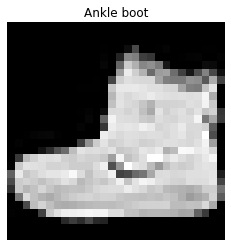

In [13]:
plt.imshow(image.squeeze(),cmap="gray")
plt.title(class_names[label]);
plt.axis(False);

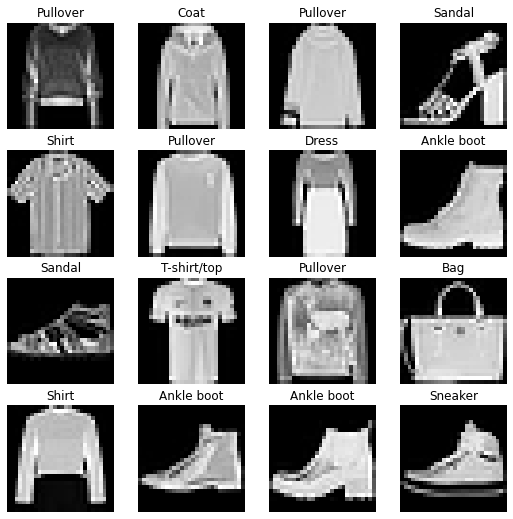

In [14]:
#plot more images
# torch.manual_seed(42)
fig=plt.figure(figsize=(9,9))
rows,cols=4,4
for i in range(1,rows*cols+1):
  random_idx=torch.randint(0,len(train_data),size=[1]).item()
  img,label=train_data[random_idx]
  plt.subplot(rows,cols,i)
  plt.imshow(img.squeeze(),cmap="gray")
  plt.title(class_names[label]);
  plt.axis(False);

##2. Prepare DataLoader

Righnow the data is in the form of Pytorch Datasets

DataLoader converts data into python iterable

MOre Specifically we want to turn our data into batches or mini-batches

Why mini batches?

- It is more computationally efficient, comp hardaware cant look at all data at one time

- It gives our nn more chances to update its gradients per epoch

In [15]:
train_data,test_data

(Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(), Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

In [16]:
from torch.utils.data import DataLoader
#train
train_dataloader=DataLoader(dataset=train_data,
                            batch_size=32,
                            shuffle=True)


# test
test_dataloader=DataLoader(dataset=test_data,
                            batch_size=32,
                            shuffle=True)

test_dataloader.batch_size,train_dataloader.batch_size,len(train_dataloader),len(test_dataloader) # test_dataloader.size(),train_dataloader.size()
train_batch_size=len(train_dataloader)
train_batch_size

1875

In [17]:
i=iter(train_dataloader)
a=next(i)
print(a[1])
b=next(i)
print(b[1])

tensor([4, 0, 3, 0, 2, 3, 0, 3, 1, 8, 7, 2, 2, 6, 7, 1, 9, 5, 9, 2, 8, 7, 3, 6,
        3, 5, 7, 9, 9, 9, 9, 3])
tensor([3, 2, 7, 9, 0, 0, 4, 8, 7, 6, 7, 7, 0, 7, 4, 0, 9, 0, 9, 8, 3, 9, 2, 1,
        2, 6, 0, 9, 6, 7, 5, 8])


In [18]:
train_features_batch,train_labels_batch=next(iter(train_dataloader))
train_features_batch.size(),train_labels_batch.size()
len(train_features_batch)

32

6


(-0.5, 27.5, 27.5, -0.5)

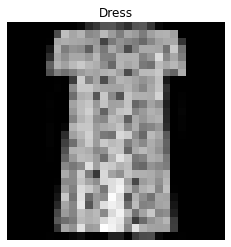

In [19]:
torch.manual_seed(42)
random_idx=torch.randint(0,len(train_features_batch),size=[1]).item()
print(random_idx)
img,label=train_features_batch[random_idx],train_labels_batch[random_idx]
# plt.plot(train_features_batch[random_idx])
plt.imshow(img.squeeze(),cmap="gray")
plt.title(class_names[label])
plt.axis(False)


In [20]:
 ##0. Build a baseline model


In [21]:
#Create a flatten layer
flatten_layer=nn.Flatten()
#Get a single smple
x=train_features_batch[0]
print(x.shape)

output=flatten_layer(x)

print(output.shape)
print(output.squeeze().shape)

torch.Size([1, 28, 28])
torch.Size([1, 784])
torch.Size([784])


In [22]:
28*28

784

In [23]:
from torch import nn
class FashionMNISTmodelV0(nn.Module):
  def __init__(self,inp,outp,hidden):
    super().__init__()
    self.layer_stack=nn.Sequential(
        nn.Flatten(),
        nn.Linear(inp,hidden),
        nn.Linear(hidden,outp)
    )
  def forward(self,x):
    return self.layer_stack(x)


In [24]:
torch.manual_seed(42)

model_0=FashionMNISTmodelV0(inp=784, #28x28
                            hidden=10,
                            outp=len(class_names)).to("cpu")
model_0


FashionMNISTmodelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [25]:
dummy_x=torch.rand([1,1,28,28])
model_0(dummy_x)

tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
         -0.1004,  0.0157]], grad_fn=<AddmmBackward0>)

In [26]:
model_0.state_dict()

OrderedDict([('layer_stack.1.weight',
              tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
                      [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
                      [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
                      ...,
                      [-0.0116,  0.0273, -0.0344,  ...,  0.0176,  0.0283, -0.0011],
                      [-0.0230,  0.0257,  0.0291,  ..., -0.0187, -0.0087,  0.0001],
                      [ 0.0176, -0.0147,  0.0053,  ..., -0.0336, -0.0221,  0.0205]])),
             ('layer_stack.1.bias',
              tensor([-0.0093,  0.0283, -0.0033,  0.0255,  0.0017,  0.0037, -0.0302, -0.0123,
                       0.0018,  0.0163])),
             ('layer_stack.2.weight',
              tensor([[ 0.0614, -0.0687,  0.0021,  0.2718,  0.2109,  0.1079, -0.2279, -0.1063,
                        0.2019,  0.2847],
                      [-0.1495,  0.1344, -0.0740,  0.2006, -0.0475, -0.2514, -0.

In [27]:
w1,b1,w2,b2=model_0.state_dict().values()

In [28]:
w1.shape,b1.shape,w2.shape,b2.shape

(torch.Size([10, 784]),
 torch.Size([10]),
 torch.Size([10, 10]),
 torch.Size([10]))

## 3.1 Setup loss ,opti and evaluation metrics

- loss_fn = Working with the multi-class data,our loss fn will be `nn.CrossentropuLoss()`
- Opti = Using `torch.optim.SGD()` or `torch.optim.Adam()`
- Metrics = Using the torchmetrics lib amd using `Accurary()` fun

In [29]:
import requests
from pathlib import Path

if Path("help_fn.py").is_file():
  print("Already imported")

else:
  request=requests.get('https://github.com/MananShukla7/Colab-Notebook/raw/main/helper_functions.py')
  with open("help_fn.py","wb") as f:
    f.write(request.content)

In [30]:
!pip -q install torchmetrics
from torchmetrics import Accuracy

acc=Accuracy(task='multiclass',num_classes=len(class_names))

loss_fn=nn.CrossEntropyLoss()
opti=torch.optim.SGD(params=model_0.parameters(),lr=0.1)
acc

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 518.6/518.6 KB 8.2 MB/s eta 0:00:00


MulticlassAccuracy()

###Creating the func to time our experiments

Machine learning is very experimental

two of the main things you'll often want to track are:

1. Model's performance
2. How fat it runs

In [31]:
from timeit import default_timer as timer

def print_train_time(start:float,
                     end:float,
                     device:str=None):
  """Print diff bw start and end time"""
  total_time=end-start
  print(f"Train time on {device}: {total_time:.3f} seconds")
  return total_time

In [32]:
start_time=timer()
#some code...
end_time=timer()
print_train_time(start_time,end_time,device="cpu")


Train time on cpu: 0.000 seconds


9.171899999671496e-05

In [33]:
# y.shape

In [34]:
def accuracy_fn(y_true, y_pred):
    """Calculates accuracy between truth labels and predictions.

    Args:
        y_true (torch.Tensor): Truth labels for predictions.
        y_pred (torch.Tensor): Predictions to be compared to predictions.

    Returns:
        [torch.float]: Accuracy value between y_true and y_pred, e.g. 78.45
    """
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct / len(y_pred)) * 100
    return acc

###3.3 Creating a training loop and train a model on batches of data

1. Loop throug epochs
2. Loop through training batches,perform training steps,calc the train loss *per batch*
3. Loop through testing batches,perform testing steps,calc the test loss *per batch*.
4. Print out whats happening.
5. Time it all(for fun)

In [35]:
#Import tqdm for progress bar
from tqdm.auto import tqdm
torch.manual_seed(42)
train_time_start_on_cpu=timer()

#epochs
epochs=3

#Create training and test loop
for epoch in tqdm(range(epochs)):
  print(f"Epochs:{epoch}\n-----")
  ##Training
  train_loss=0
  #add a poop to loop through the training batches
  for batch, (X,y) in enumerate(train_dataloader):
    # batch,X,y=batch.to(device),X.to(device),y.to(device)
    # print(X[:5],y)
    model_0.train()
    #1. Forward pass
    y_pred=model_0(X)

    #2.calc the loss(per batch)
    loss=loss_fn(y_pred,y)
    train_loss+=loss

    # test_acc+=accuracy_fn(y,y_pred.argmax(dim=1))
    
    opti.zero_grad()

    loss.backward()

    #NOTE: the opti will update the params of the model once per batch instead of once per epoch!
    opti.step()

    #Print out whats happenin
    if batch%400==0:
      print(f"Looked at {batch*len(X)}/{len(train_dataloader.dataset)} samples.")
    
  #Divide total traon loss by len of train dataloader
  train_loss/=len(train_dataloader)
  
  ###Testing 
  test_loss,test_acc=0,0
  model_0.eval()
  with torch.inference_mode():
    for X_test,y_test in test_dataloader:
      # batch,X_test,y_test=batch.to(device),X_test.to(device),y_test.to(device)
      #1. Forward pass
      test_pred=model_0(X_test)

      #Calc the loss
      test_loss+=loss_fn(test_pred,y_test)

      test_acc+=acc(test_pred.argmax(dim=1),y_test)

    #Calc the test loss avg per batch
    test_loss/=len(test_dataloader)

    #Calc the test acc avg per batch
    test_acc/=len(test_dataloader)
  #print out
  print(f"\nTrain Loss: {loss:.4f} |  test Loss: {test_loss:.4f} |  Test acc: {test_acc:.4f}")

  #calc training time
  train_time_end_on_cpu=timer()
  #calc the train time
  total_train_time_model_0=print_train_time(train_time_end_on_cpu,train_time_start_on_cpu,device=str(next(model_0.parameters()).device))






  0%|          | 0/3 [00:00<?, ?it/s]

Epochs:0
-----
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

Train Loss: 0.4652 |  test Loss: 0.5102 |  Test acc: 0.8204
Train time on cpu: -16.679 seconds
Epochs:1
-----
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

Train Loss: 0.3622 |  test Loss: 0.5268 |  Test acc: 0.8168
Train time on cpu: -32.066 seconds
Epochs:2
-----
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

Train Loss: 0.6687 |  test Loss: 0.5126 |  Test acc: 0.8300
Train time on cpu: -51.350 seconds


In [36]:
next(model_0.parameters()).device

device(type='cpu')

In [38]:
device="cuda" if torch.cuda.is_available() else "cpu"

##4. Make preds for model_0 results

In [52]:
torch.manual_seed(42)
def eval_model(model:torch.nn.Module,
               data_loader:torch.utils.data.DataLoader,
               loss_fn:torch.nn.Module,
               accuracy_fn,
               device=device):
  
  """Return a dictionary containing the results of model predicting on data loader"""
  loss,acc=0,0
  model.eval()
  with torch.inference_mode():
    for X,y in tqdm(data_loader):
      X,y=X.to(device),y.to(device)
      #Make preds
      y_pred=model(X)

      loss+=loss_fn(y_pred,y)
      acc+=accuracy_fn(y_true=y,
                       y_pred=y_pred.argmax(dim=1))
      
    #Scale loss and acc to find the avg loss/acc per batch
    loss/=len(data_loader)
    acc/=len(data_loader)

    return{"model_name":model.__class__.__name__,
           "model_loss":loss.item(),
           "model_acc":acc}

#Calc the model 0 results on test datasets
model_0_results=eval_model(model=model_0,
                            data_loader=test_dataloader,
                            loss_fn=loss_fn,
                            accuracy_fn=accuracy_fn,
                            device="cpu")
model_0_results

      
      
      
                       

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTmodelV0',
 'model_loss': 0.512529730796814,
 'model_acc': 83.00718849840256}

In [53]:
##5. Setup device agnostiv code:
device ="cuda" if torch.cuda.is_available() else "cpu"

In [54]:
!nvidia-smi

Fri Mar  3 11:06:30 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   47C    P0    28W /  70W |    805MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [55]:
#Non-linear funcs
class FashionMNISTmodelV1(nn.Module):
  def __init__(self,inp,outp,hidden):
    super().__init__()
    self.layer_stack=nn.Sequential(
        nn.Flatten(),
        nn.Linear(inp,hidden),
        nn.ReLU(),
        nn.Linear(hidden,outp),
        nn.ReLU()
    )
  def forward(self,x):
    return self.layer_stack(x)


In [56]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

model_1=FashionMNISTmodelV0(inp=784, #28x28
                            hidden=10,
                            outp=len(class_names)).to(device)
model_1

FashionMNISTmodelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [57]:
acc=Accuracy(task="multiclass",num_classes=len(class_names)).to(device)

In [58]:
loss_fn=nn.CrossEntropyLoss()
opti=torch.optim.Adam(params=model_1.parameters(),lr=0.015)

In [46]:
#Import tqdm for progress bar
from tqdm.auto import tqdm
torch.manual_seed(42)
torch.cuda.manual_seed(42)
train_time_start_on_cpu=timer()

#epochs
epochs=5

#Create training and test loop
for epoch in tqdm(range(epochs)):
  print(f"Epochs:{epoch}\n-----")
  ##Training
  train_loss=0
  #add a poop to loop through the training batches
  for batch, (X,y) in enumerate(train_dataloader):
    X,y=X.to(device),y.to(device)
    # batch,X,y=batch.to(device),X.to(device),y.to(device)
    # print(X[:5],y)
    model_1.train()
    #1. Forward pass
    y_pred=model_1(X)

    #2.calc the loss(per batch)
    loss=loss_fn(y_pred,y)
    train_loss+=loss

    # test_acc+=accuracy_fn(y,y_pred.argmax(dim=1))
    
    opti.zero_grad()

    loss.backward()

    #NOTE: the opti will update the params of the model once per batch instead of once per epoch!
    opti.step()

    #Print out whats happenin
    if batch%400==0:
      print(f"Looked at {batch*len(X)}/{len(train_dataloader.dataset)} samples.")
    
  #Divide total traon loss by len of train dataloader
  train_loss/=len(train_dataloader)
  
  ###Testing 
  test_loss,test_acc=0,0
  model_1.eval()
  with torch.inference_mode():
    for X_test,y_test in test_dataloader:
      X_test,y_test=X_test.to(device),y_test.to(device)
      #1. Forward pass
      test_pred=model_1(X_test)

      #Calc the loss
      test_loss+=loss_fn(test_pred,y_test)

      # test_acc+=acc(test_pred.argmax(dim=1),y_test)
      test_acc+=accuracy_fn(y_test,test_pred.argmax(dim=1))

    #Calc the test loss avg per batch
    test_loss/=len(test_dataloader)

    #Calc the test acc avg per batch
    test_acc/=len(test_dataloader)
  #print out
  print(f"\nTrain Loss: {loss:.4f} |  test Loss: {test_loss:.4f} |  Test acc: {test_acc:.4f}")

  #calc training time
  train_time_end_on_cpu=timer()
  #calc the train time
  total_train_time_model_0=print_train_time(train_time_end_on_cpu,train_time_start_on_cpu,device=str(next(model_0.parameters()).device))






  0%|          | 0/5 [00:00<?, ?it/s]

Epochs:0
-----
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

Train Loss: 0.2674 |  test Loss: 0.5410 |  Test acc: 81.1901
Train time on cpu: -16.017 seconds
Epochs:1
-----
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

Train Loss: 0.4404 |  test Loss: 0.5543 |  Test acc: 81.1601
Train time on cpu: -29.955 seconds
Epochs:2
-----
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

Train Loss: 0.8118 |  test Loss: 0.5674 |  Test acc: 81.5795
Train time on cpu: -49.762 seconds
Epochs:3
-----
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

Train Loss: 0.6171 |  test Loss: 0.5490 |  T

In [47]:
import torchmetrics
from tqdm.auto import tqdm
###Writing functions fo training and testing loops
def train_step(model:torch.nn.Module,
               data:torch.utils.data.DataLoader,
               loss_fn:torch.nn.Module,
               opti:torch.optim.Optimizer,
               accuracy_fn,
               device:torch.device):
  """Performs a training with model trying to learn on data_loader"""
  train_loss,train_acc=0,0
  for batch,(X,y) in enumerate(data):

    X,y=X.to(device),y.to(device)
    model.train()
    pred=model(X)

    loss=loss_fn(pred,y)
    train_loss+=loss

    train_acc+=accuracy_fn(y,pred.argmax(dim=1))

    opti.zero_grad()

    loss.backward()

    opti.step()

    # if batch%400==0:
      # print(f"looked at {batch*len(X)}/{len(data.dataset)}")

  train_loss/=len(data)
  train_acc/=len(data)
  print(f"Train_loss: {train_loss:.5f} | Train_acc: {train_acc:.2f}")
 


In [48]:
def test_step(model:torch.nn.Module,
               data:torch.utils.data.DataLoader,
               loss_fn:torch.nn.Module,
               opti:torch.optim.Optimizer,
               accuracy_fn,
               device:torch.device):
  """
    Performs testing with model trying to learn on data_loader
    Padhaya hua yaad hai ki nai dekhne ke liye hai re baba!!  
  """
  test_loss,test_acc=0,0
  model.eval()
  with torch.inference_mode():
    for batch,(X,y) in enumerate(data):
      X,y=X.to(device),y.to(device)
      
      pred=model(X)

      test_loss+=loss_fn(pred,y)

      test_acc+=accuracy_fn(y,pred.argmax(dim=1))

      # if batch%400==0:
        # print(f"looked at {batch*len(X)}/{len(data.dataset)}")

    test_loss/=len(data)
    test_acc/=len(data)
    print(f"Test_loss: {test_loss:.5f} | Test_acc: {test_acc:.2f}")
  

In [49]:
from timeit import default_timer as timer

start_time_gpu=timer()
epochs=3

for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n---------")

  train_step(model_1,train_dataloader,loss_fn,opti,accuracy_fn,device)

  test_step(model_1,test_dataloader,loss_fn,opti,accuracy_fn,device)

end_timer_gpu=timer()

print(print_train_time(end_timer_gpu,start_time_gpu,"cuda"))

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
---------
Train_loss: 0.52102 | Train_acc: 82.54
Test_loss: 0.55151 | Test_acc: 82.17
Epoch: 1
---------
Train_loss: 0.51353 | Train_acc: 82.94
Test_loss: 0.60565 | Test_acc: 81.32
Epoch: 2
---------
Train_loss: 0.51419 | Train_acc: 82.79
Test_loss: 0.64265 | Test_acc: 79.35
Train time on cuda: -38.989 seconds
-38.98864045700003


In [50]:
len(train_dataloader.dataset),len(train_dataloader)

(60000, 1875)

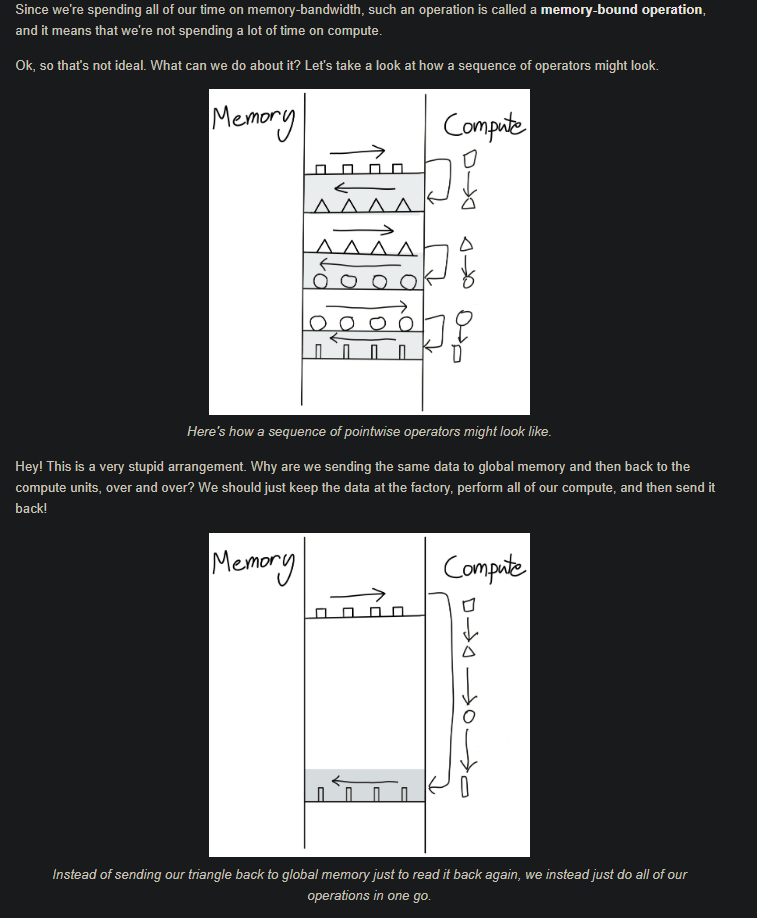

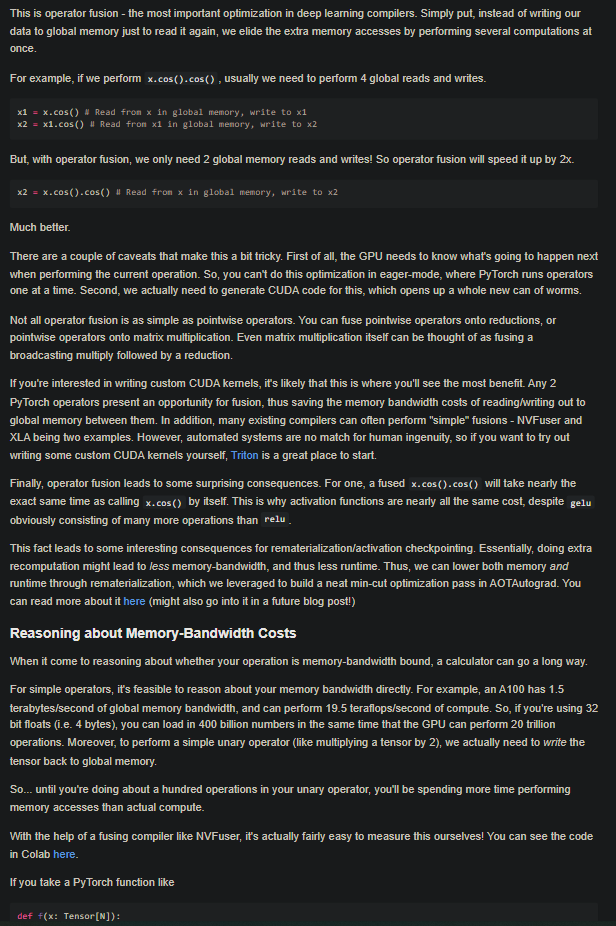

In [59]:
model_1_results=eval_model(model_1,test_dataloader,loss_fn,accuracy_fn,device)


  0%|          | 0/313 [00:00<?, ?it/s]

In [60]:
model_1_results

{'model_name': 'FashionMNISTmodelV0',
 'model_loss': 2.3189079761505127,
 'model_acc': 10.86261980830671}

In [61]:
model_0_results

{'model_name': 'FashionMNISTmodelV0',
 'model_loss': 0.512529730796814,
 'model_acc': 83.00718849840256}

In [62]:
# from google.colab import drive
# drive.mount("/content/gdrive")

In [63]:

# from IPython.display import HTML
# from base64 import b64encode
# import os

# # Input video path
# save_path = "/content/gdrive/MyDrive/Rec/(597) MIT 6.S191_ Convolutional Neural Networks - YouTube - Google Chrome 2023-03-03 15-48-46.mp4"

# # Compressed video path
# # compressed_path = "/content/gdrive/MyDrive/Rec/compressed_video.mp4"

# os.system(f"ffmpeg -i {save_path} -vcodec libx264 {save_path}")

# # Show video
# mp4 = open(save_path,'rb').read()
# data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
# HTML("""
# <video width=400 controls>
#       <source src="%s" type="video/mp4">
# </video>
# """ % data_url)

##Model 2:Building a convolutional NN(CNN)

CNN's are also known as convnets

they are known for their ability to fing patterns in visual data

In [79]:
class FashionMNISTmodelV2(nn.Module):
  def __init__(self,inp,outp,hidden):
    super().__init__()
    self.conv_block_1=nn.Sequential(
      nn.Conv2d(in_channels=inp,
                out_channels=hidden,
                kernel_size=3,
                stride=1,
                padding=1), #Setting hyper parameters
      nn.ReLU(),


      nn.Conv2d(in_channels=hidden,
                out_channels=hidden,
                kernel_size=3,
                stride=1,
                padding=1),
      nn.ReLU(),
      nn.MaxPool2d(kernel_size=2)
    )
    self.conv_block_2=nn.Sequential(
      nn.Conv2d(in_channels=hidden,
                out_channels=hidden,
                kernel_size=3,
                stride=1,
                padding=1),
      nn.ReLU(),

      nn.Conv2d(in_channels=hidden,
                out_channels=hidden,
                kernel_size=3,
                stride=1,
                padding=1),
      nn.ReLU(),
      nn.MaxPool2d(kernel_size=2),
    )

    self.Classifier=nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden*0,
                  out_features=outp)
    )
  
  def forward(self,x):
    x=self.conv_block_1(x)
    print(x.shape)
    x=self.conv_block_2(x)
    print(x.shape)
    x=self.Classifier(x)
    print(x.shape)


In [80]:
torch.manual_seed(42)
model_2=FashionMNISTmodelV2(inp=1,
                            hidden=10,
                            outp=len(class_names)).to(device)

/usr/local/lib/python3.8/dist-packages/torch/nn/init.py:405: UserWarning: Initializing zero-element tensors is a no-op
  warnings.warn("Initializing zero-element tensors is a no-op")


In [81]:
  model_2.to(device)

FashionMNISTmodelV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (Classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=0, out_features=10, bias=True)
  )
)